<a href="https://colab.research.google.com/github/Suryageeks/ML-Crate/blob/main/Eye_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle Utilities

In [1]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d bongsang/eye-disease-deep-learning-dataset

 97% 230M/237M [00:08<00:00, 29.8MB/s]
100% 237M/237M [00:08<00:00, 28.5MB/s]


In [11]:
!unzip "/content/eye-disease-deep-learning-dataset.zip" -d "/content/"

Archive:  /content/eye-disease-deep-learning-dataset.zip
  inflating: /content/dataset/images/1.jpg  
  inflating: /content/dataset/images/10.jpg  
  inflating: /content/dataset/images/100.jpg  
  inflating: /content/dataset/images/101.jpg  
  inflating: /content/dataset/images/102.jpg  
  inflating: /content/dataset/images/103.jpg  
  inflating: /content/dataset/images/104.jpg  
  inflating: /content/dataset/images/105.jpg  
  inflating: /content/dataset/images/106.jpg  
  inflating: /content/dataset/images/107.jpg  
  inflating: /content/dataset/images/108.jpg  
  inflating: /content/dataset/images/109.jpg  
  inflating: /content/dataset/images/11.jpg  
  inflating: /content/dataset/images/110.jpg  
  inflating: /content/dataset/images/111.jpg  
  inflating: /content/dataset/images/112.jpg  
  inflating: /content/dataset/images/113.jpg  
  inflating: /content/dataset/images/114.jpg  
  inflating: /content/dataset/images/115.jpg  
  inflating: /content/dataset/images/116.jpg  
  infla

# Loading The Dataset

In [62]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
path='/content/dataset/labels.csv'
df=pd.read_csv(path)
df.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [ ]:
df.info()

In [16]:
train_image='/content/dataset/images'
train_image

'/content/dataset/images'

In [17]:
df.nunique()

name        712
category      3
type          5
grade         5
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      712 non-null    object
 1   category  712 non-null    int64 
 2   type      712 non-null    int64 
 3   grade     712 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.4+ KB


In [19]:
df['category'].unique()

array([0, 1, 2])

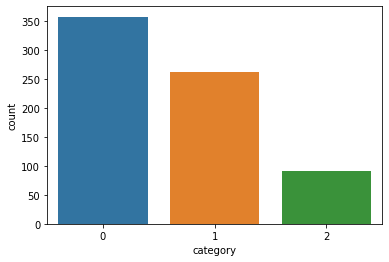

In [63]:
sns.countplot(df['category'])

#Preprocessing

In [24]:
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/dataset/images/'+df['name'][i], target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 712/712 [00:50<00:00, 14.01it/s]


In [25]:
X.shape

(712, 224, 224, 3)

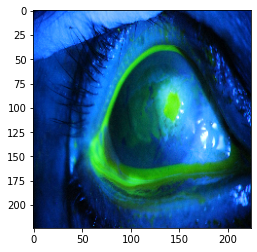

In [26]:
plt.imshow(X[359])

In [27]:
df['category'][359]

1

In [28]:
y=df['category'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=True)

#Model Building

In [30]:
import tensorflow
from tensorflow.keras import layers,models
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Input,Dense,Flatten,Activation,MaxPooling2D,InputLayer,GlobalMaxPool2D,Dropout,GlobalAveragePooling2D,AveragePooling2D
from warnings import filterwarnings
import tensorflow.keras.backend as k
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as k

**Data Augmentation**

In [31]:
aug=ImageDataGenerator(rotation_range=10,
                      zoom_range=0.2,
                      horizontal_flip=True,     
                      rescale=1/.255                           
                      )

**We are using InceptionResNetV2 a pretrained model to do the predictions**

In [32]:
InceptionResNet=tensorflow.keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=Input(shape=(224, 224, 3)),
    pooling='avg',
    classifier_activation="softmax")

225222656/225209952 [==============================] - 8s 0us/step


In [33]:
InceptionResNet.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

**Modify the Pretrained Model**

In [35]:
from tensorflow.keras import regularizers
x=InceptionResNet.output
x=Flatten()(x)
x=Dense(256,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
x=Dropout(0.5)(x)
x=Dense(3,activation='softmax')(x)
model=Model(inputs=InceptionResNet.input,outputs=x)

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

**Compiling and Training the Model**

In [37]:
model.compile(optimizer='adam',
             loss=tensorflow.keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']          
             )

In [38]:
#Converting the integers to binary class matrix
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(498, 224, 224, 3)
(498, 3)
(214, 224, 224, 3)
(214, 3)


In [40]:
hist=model.fit(
    aug.flow(X_train,y_train,batch_size=32),
    steps_per_epoch=len(X_train)//32,
    validation_data=(X_test,y_test),
    validation_steps=len(X_test)//32,
    epochs=45)

Epoch 1/45
15/15 [==============================] - 75s 2s/step - loss: 1.1689 - accuracy: 0.5086 - val_loss: 1.1256 - val_accuracy: 0.4907
Epoch 2/45
15/15 [==============================] - 23s 2s/step - loss: 1.0319 - accuracy: 0.6416 - val_loss: 1.0426 - val_accuracy: 0.4907
Epoch 3/45
15/15 [==============================] - 23s 2s/step - loss: 0.8983 - accuracy: 0.7082 - val_loss: 0.9984 - val_accuracy: 0.4907
Epoch 4/45
15/15 [==============================] - 23s 2s/step - loss: 0.7890 - accuracy: 0.7296 - val_loss: 0.9786 - val_accuracy: 0.4907
Epoch 5/45
15/15 [==============================] - 23s 2s/step - loss: 0.7076 - accuracy: 0.7532 - val_loss: 0.9661 - val_accuracy: 0.4907
Epoch 6/45
15/15 [==============================] - 23s 2s/step - loss: 0.6656 - accuracy: 0.7575 - val_loss: 0.9736 - val_accuracy: 0.4907
Epoch 7/45
15/15 [==============================] - 23s 2s/step - loss: 0.6261 - accuracy: 0.7532 - val_loss: 1.5702 - val_accuracy: 0.4907
Epoch 8/45
15/15 [==

In [ ]:
#k.clear_session()

**Model Predictions**

In [41]:
y_pred=model.predict(X_test)

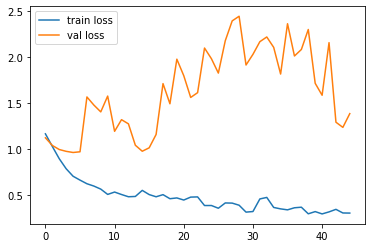

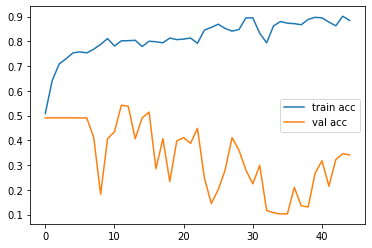

<Figure size 432x288 with 0 Axes>

In [67]:
import pandas as pd
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Validation_loss')

plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Validation_accuracy')

In [43]:
df.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [44]:
y_pred

array([[0.14628802, 0.37882346, 0.47488844],
       [0.15247174, 0.5030651 , 0.3444631 ],
       [0.15247174, 0.5030651 , 0.3444631 ],
       [0.15247673, 0.50306374, 0.34445953],
       [0.02508857, 0.23920864, 0.7357028 ],
       [0.02831741, 0.24319582, 0.7284868 ],
       [0.17587757, 0.38251618, 0.44160622],
       [0.38534796, 0.3454886 , 0.26916343],
       [0.09863634, 0.35300955, 0.5483541 ],
       [0.15247174, 0.5030651 , 0.3444631 ],
       [0.15247174, 0.5030651 , 0.3444631 ],
       [0.15247174, 0.5030651 , 0.3444631 ],
       [0.41177163, 0.3321707 , 0.25605765],
       [0.12785634, 0.3687122 , 0.5034315 ],
       [0.19116355, 0.3888157 , 0.4200208 ],
       [0.03127005, 0.25197503, 0.7167549 ],
       [0.02026346, 0.21579298, 0.76394355],
       [0.03026201, 0.2617767 , 0.7079613 ],
       [0.02514775, 0.23662801, 0.7382242 ],
       [0.14214869, 0.37708142, 0.4807698 ],
       [0.07590317, 0.3234165 , 0.60068035],
       [0.15247174, 0.5030651 , 0.3444631 ],
       [0.

In [47]:
y_pred=np.argmax(y_pred,axis=1)

#Model Statistics

In [48]:
from sklearn.metrics import classification_report , confusion_matrix

In [49]:
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.55      0.22      0.31       105
           1       0.36      0.40      0.38        87
           2       0.20      0.68      0.31        22

    accuracy                           0.34       214
   macro avg       0.37      0.43      0.33       214
weighted avg       0.43      0.34      0.34       214



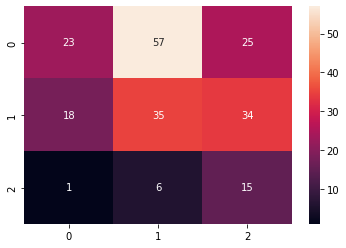

In [53]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred),annot=True)

#Saving The Model

In [45]:
model.save('./eye_model.h5')